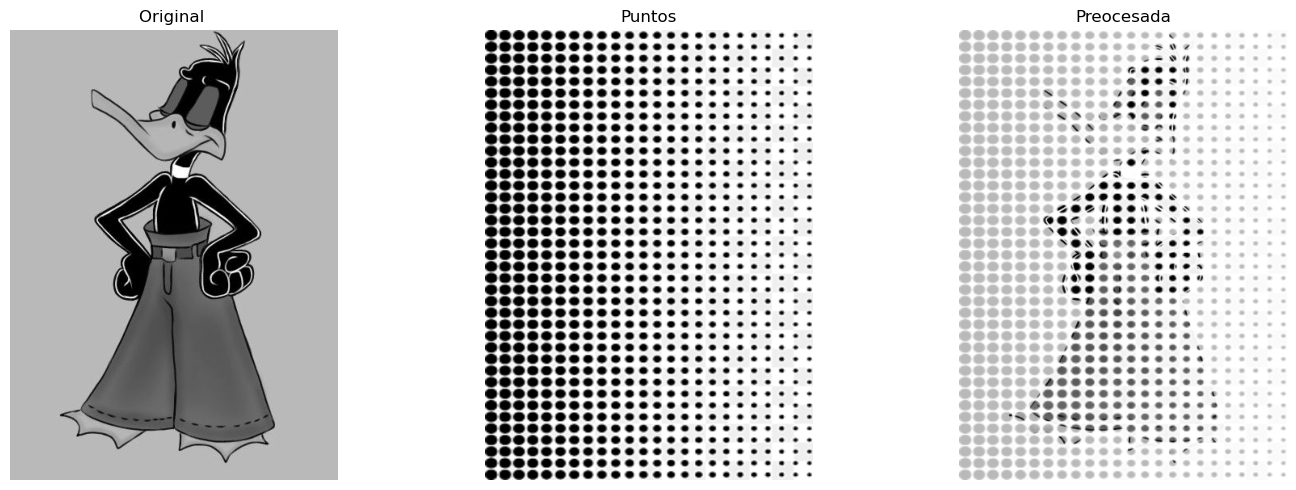

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

pato = cv2.imread('pato.jpg')
puntos = cv2.imread('puntos.png', cv2.IMREAD_GRAYSCALE)  

pato_gris = cv2.cvtColor(pato, cv2.COLOR_BGR2GRAY)

puntos = cv2.resize(puntos, (pato_gris.shape[1], pato_gris.shape[0]))

alpha = 255 - puntos
alpha_norm = alpha.astype(np.float32) / 255.0

resultado = (pato_gris * alpha_norm + 255 * (1 - alpha_norm)).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(pato_gris, cmap='gray')
plt.title("Original ")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(puntos, cmap='gray')
plt.title("Puntos")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resultado, cmap='gray')
plt.title("Preocesada")
plt.axis('off')

plt.tight_layout()
plt.show()


Objetos detectados por color:
azul: 6
verde: 19
cyan: 12
naranja: 15
rojo: 2
amarillo: 18
rosa: 2


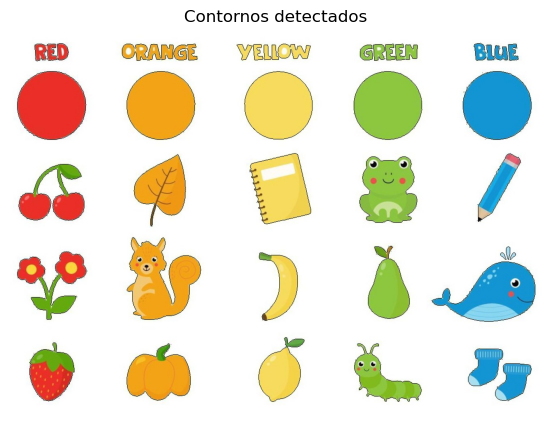

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

imagen = cv2.imread('2.jpg')
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
_, binaria = cv2.threshold(gris, 240, 255, cv2.THRESH_BINARY_INV)  

contornos, _ = cv2.findContours(binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

conteo_colores = defaultdict(int)

colores_hsv = {
    'rojo': [(0, 100, 100), (10, 255, 255)],
    'naranja': [(11, 100, 100), (25, 255, 255)],
    'amarillo': [(26, 100, 100), (35, 255, 255)],
    'verde': [(36, 100, 100), (85, 255, 255)],
    'cyan': [(86, 100, 100), (100, 255, 255)],
    'azul': [(101, 100, 100), (130, 255, 255)],
    'violeta': [(131, 100, 100), (160, 255, 255)],
    'rosa': [(161, 100, 100), (179, 255, 255)]
}

for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    objeto = imagen_hsv[y:y+h, x:x+w]
    color_medio = cv2.mean(objeto)[:3]
    h_medio = int(color_medio[0])

    color_detectado = None
    for nombre, (bajo, alto) in colores_hsv.items():
        if bajo[0] <= h_medio <= alto[0]:
            color_detectado = nombre
            break

    if color_detectado:
        conteo_colores[color_detectado] += 1

print("Objetos detectados por color:")
for color, cantidad in conteo_colores.items():
    print(f"{color}: {cantidad}")

imagen_con_contornos = imagen_rgb.copy()
cv2.drawContours(imagen_con_contornos, contornos, -1, (0, 0, 0), 1)

plt.figure(figsize=(10, 5))
plt.imshow(imagen_con_contornos)
plt.title("Contornos detectados")
plt.axis('off')
plt.show()



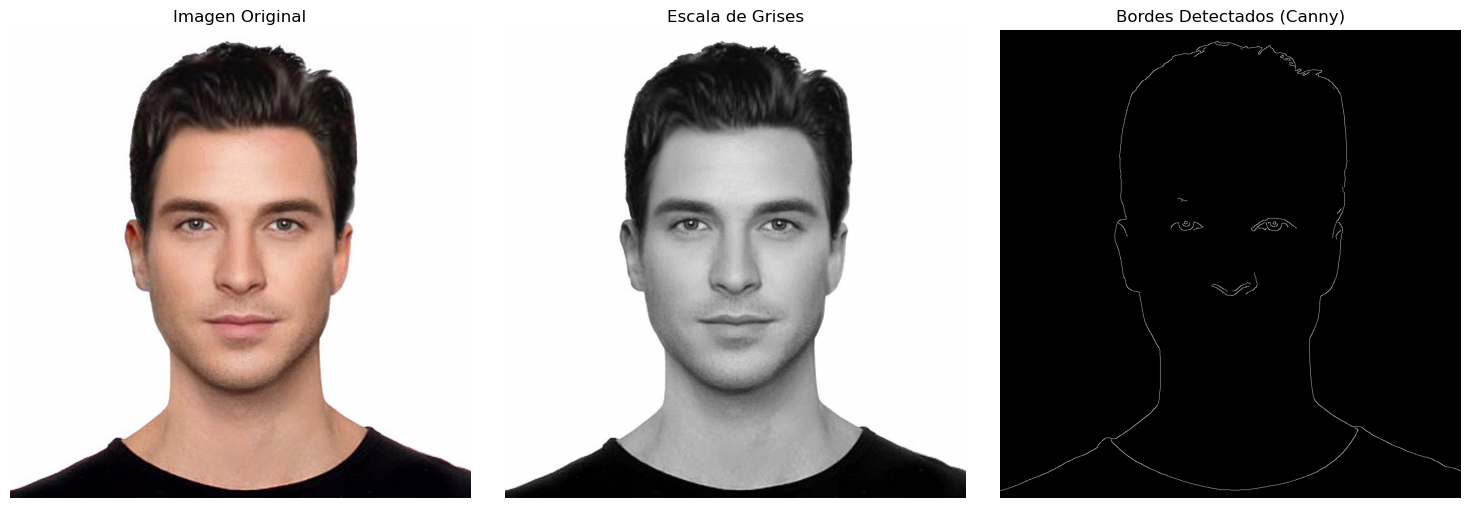

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imagen = cv2.imread('rostro.jpg')  
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

gauss = cv2.GaussianBlur(gris, (5, 5), 1.4)

bordes = cv2.Canny(gauss, threshold1=50, threshold2=150)

plt.figure(figsize=(15, 5))



plt.subplot(1, 3, 2)
plt.imshow(gris, cmap='gray')
plt.title("Escala de Grises")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bordes, cmap='gray')
plt.title("Bordes Detectados (Canny)")
plt.axis('off')

plt.tight_layout()
plt.show()
